[]

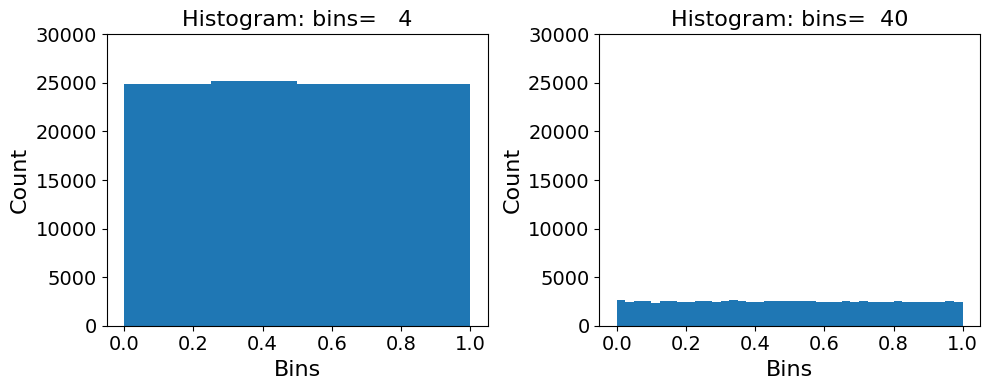

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(100000,1)

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,4))

n1bins = 4

ax[0].hist(x, bins=n1bins)
ax[0].set_ylim(0,30000)
ax[0].set_xlabel("Bins", fontsize=16)
ax[0].set_ylabel("Count", fontsize=16)
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].set_title("Histogram: bins=%4d"%(n1bins), fontsize=16)

n2bins = 40

ax[1].hist(x, bins=n2bins)
ax[1].set_ylim(0,30000)
ax[1].set_xlabel("Bins", fontsize=16)
ax[1].set_ylabel("Count", fontsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[1].set_title("Histogram: bins=%4d"%(n2bins), fontsize=16)

plt.tight_layout()
# plt.savefig("histograms_uniform.png")
plt.plot()

(array([  3.,   4.,   6.,   9.,  14.,  39.,  53.,  69.,  83.,  98., 103.,
        142.,  99., 105.,  62.,  50.,  20.,  28.,   7.,   6.]),
 array([-4.43257559, -4.02895112, -3.62532665, -3.22170218, -2.81807771,
        -2.41445324, -2.01082877, -1.6072043 , -1.20357983, -0.79995536,
        -0.39633089,  0.00729358,  0.41091805,  0.81454251,  1.21816698,
         1.62179145,  2.02541592,  2.42904039,  2.83266486,  3.23628933,
         3.6399138 ]),
 <BarContainer object of 20 artists>)

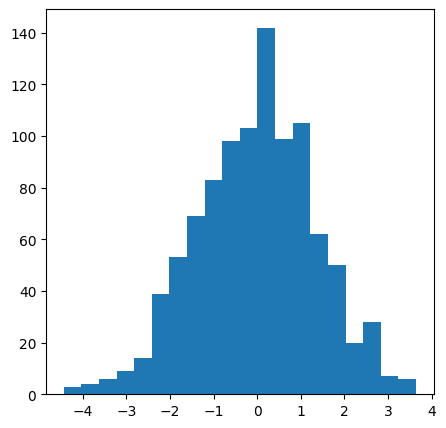

In [4]:
N = 1000
x1 = np.zeros(N)
for n in range(N):
    x1[n] = np.sum(np.random.rand(12,1)) - np.sum(np.random.rand(12,1))
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(x1, 20)


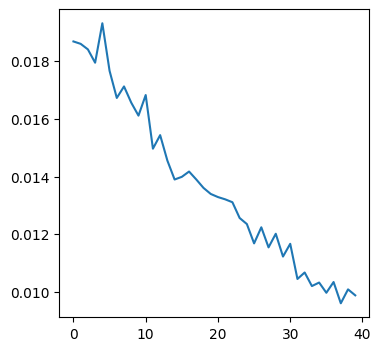

In [5]:
MaxTrial = 2000
sampleSizeRange = np.linspace(100, 200, 40) # 40 evenly distributed numbers btwn 100 - 200

'''
[100.         102.56410256 105.12820513 107.69230769 110.25641026
 112.82051282 115.38461538 117.94871795 120.51282051 123.07692308
 125.64102564 128.20512821 130.76923077 133.33333333 135.8974359
 138.46153846 141.02564103 143.58974359 146.15384615 148.71794872
 151.28205128 153.84615385 156.41025641 158.97435897 161.53846154
 164.1025641  166.66666667 169.23076923 171.79487179 174.35897436
 176.92307692 179.48717949 182.05128205 184.61538462 187.17948718
 189.74358974 192.30769231 194.87179487 197.43589744 200.        ]
'''


plotVar = np.zeros(len(sampleSizeRange))

for sSize in range(len(sampleSizeRange)): # iterate above evenly distributed array
    sampleSizes = int(sampleSizeRange[sSize]) # sampleSizes = [100, 102, 105, 107, 110, ...]
    vStrial = np.zeros(MaxTrial) # array with length 2000 filled with zeroes
    for trial in range(MaxTrial): 
        xx = np.random.randn(sampleSizes,1) # generate a simple with the sample size "sampleSizes"
        vStrial[trial] = np.var(xx) # assign variance of above generated sample
    plotVar[sSize] = np.var(vStrial) # varience of the 2000 sample variences generated above
fig, ax = plt.subplots(figsize=(4,4))
ax.plot((plotVar))

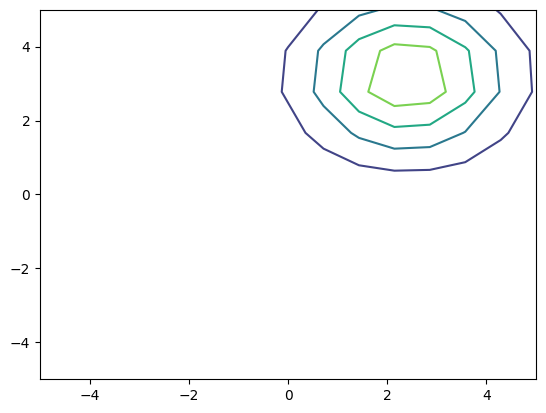

In [5]:
def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C1)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * dC
    return num/den

def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')

    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
    return X, Y, Z

nx, ny = 50, 40
m1 = np.array([2.4,3.2])
C1 = np.array([[2,0], [0,2]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1)
plt.contour(Xp, Yp, Zp, 5)

[[2. 1.]
 [1. 2.]]
(1000, 2)
(1000, 2)


(-6.0, 6.0)

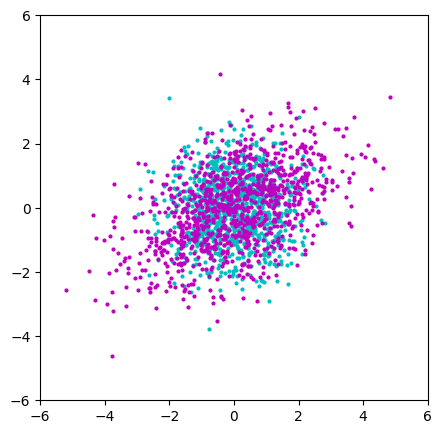

In [8]:
C = np.array([[2.0,1.0], [1.0,2.0]])
A = np.linalg.cholesky(C)
print(A @ A.T)

X = np.random.randn(1000,2)
Y = X @ A
print(X.shape)
print(Y.shape)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X[:,0], X[:,1], c="c", s=4)
ax.scatter(Y[:,0], Y[:,1], c="m", s=4)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

The vector:  [0.8660254037844386, 0.5000000000000001]
Magnitude :  1.0
Angle :  59.99999999999999
(1000,)
Projected variance:  3.1412460250788543
0.9647669694445505
EigResult(eigenvalues=array([3., 1.]), eigenvectors=array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))


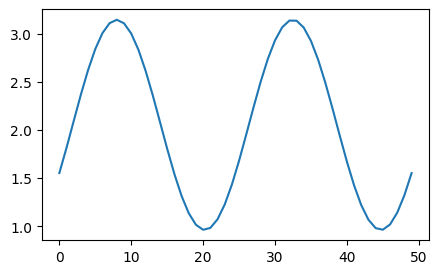

In [13]:
theta = np.pi/3
u = [np.sin(theta), np.cos(theta)]
print("The vector: ", u)
print("Magnitude : ", np.sqrt(u[0]**2 + u[1]**2))
print("Angle : ", theta*180/np.pi)

yp = Y @ u
print(yp.shape)
print("Projected variance: ", np.var(yp))

# Store projected variances in pVars & plot
#
nPoints = 50
pVars = np.zeros(nPoints)
thRange = np.linspace(0, 2*np.pi, nPoints)
for n in range(nPoints):
    theta = thRange[n]
    u = [np.sin(theta), np.cos(theta)]
    pVars[n] = np.var(Y @ u)
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(pVars)
print(min(pVars))
print(np.linalg.eig(C))